# Define Profitable App Profiles for the App Store and Google Play Markets

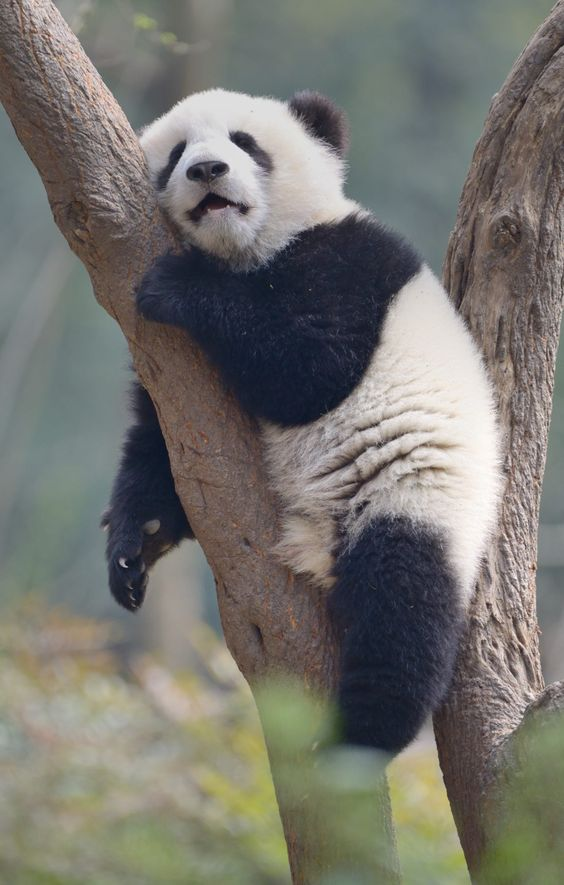


`The main goal of this project  -  clean datasets and define most popular free application for Google Android and Apple IOS operation systems using only standard Python library without using any specialized Python libraries for dataframes or arrays like Python Pandas, Numpy ant etc.`


## 1. Opening,  Exploring and cleaning the Data
As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

Collecting data for over four million apps requires a significant amount of time and money, so we'll try to analyze a sample of data instead. To avoid spending resources with collecting new data ourselves, we should first try to see whether we can find any relevant existing data at no cost. Luckily, these are two data sets that seem suitable for our purpose:

<a href="https://www.kaggle.com/lava18/google-play-store-apps" target="_blank"> A data set </a>
containing data about approximately ten thousand Android apps from Google Play. You can download the data set directly from this 
<a href="https://dq-content.s3.amazonaws.com/350/googleplaystore.csv" target="_blank"> link</a>.

<a href="https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps" target="_blank"> A data set </a> containing data about approximately seven thousand iOS apps from the App Store. You can download the data set directly from this 
<a href="https://dq-content.s3.amazonaws.com/350/AppleStore.csv" target="_blank"> link</a>.

Extract dataset from AppleStore.csv and googleplaystore.csv and separate theirs headers and data lists.

In [1]:
def csv_reader(csvname, header = True):
    from csv import reader
    """
    Help on custom csv_reader:
    Open cvs file  and return data as lists.
    Required   arguments - csvname and False:
    1. With defaults arguments returns two separate lists - header as  list[0:1]
    and list with data as list[1:].
    2. With one argument csvfile returns list containing header as list[:]   
    Module csv using for export csv files to list
    """ 
    try:
        open_file = open(csvname)
        read_file = reader(open_file)
        data = list(read_file)
        if header:
            return data[0], data[1:]
        return data
    except Exception as X:
        print("Error: {}! in the csv_reader function!".format(X))


android_header, android_raw =(csv_reader('data/googleplaystore.csv'))
ios_header, ios_raw = (csv_reader('data/AppleStore.csv'))

let's take a look at those list.

In [2]:
def extr_var_name(variablename):
    """
    Help on extr_var_name:
    Extract name of variable of from global space name and return it.  
    Required  argument- object name
    """
    try:
        for name in globals():
            
            if eval(name) == variablename:
                return name
    
    except Exception as X:
        return ("Error  {} in the  extr_var_name() function".format(X))


def list_veiwer(listname, start = 0, end = 0):
    """
    Help on custom function list_veiwer (listname(list), start(int) , end (int)):
    Takes in list and returns detailed information about it and optional views
    defined range elements or columns.
    Required   arguments -   one or three:
    1. listname returns general information about list and views first row.
    2. list_veiwer(list, start, end) returns general information about list
    and view rows between start and end-1.
    Convert negative index to positive index.
    """
    try:
        testlist = listname[:]
        rows = len(testlist)
        namelist = extr_var_name(testlist)
        
        if not rows:
            return "The {} is a empty list with zero rows and columns!"\
                .format(namelist), testlist 
        
        if not isinstance(testlist[0], list):
            elements = len(testlist)
            if elements > 101:
                print_limit = 100
            else:
                print_limit = elements
            return "The {} is a single row list contains {:,} elements.\
\nView  first {} element.".format(namelist, elements, print_limit), testlist
        columns = len(testlist[0])
        
        if start == 0 and end == 0:
            return "The {} is a list contains {:,} rows and {:,} columns.\
\nView its first row".format(namelist, rows, columns), testlist[0]
        
        if  start == end:
            return "Entered start and end are same!The  {} contains {:,} row  and\
{:,} columns. View first row:".format(namelist, rows, columns), testlist[0]
        
        if start < 0:
            start = start + rows
        if end < 0:
            end = end + rows
        
        if start > end:
            return "Entered start greater than end! The  {} is a list contains {:,}\
row  and {:,} columns. View first row:".format(namelist, rows, columns), testlist[0]
        
        return_list =["The  {} list contains {:,} rows  and {:,} columns\
\nView rows from {:,} to {}  ".format(namelist, rows, columns,start, end-1)]
        row_no = [a for a in range(start, end)]
        for i in row_no:
            return_list.append(testlist[i]) 
        return return_list
    except Exception as X:
        return  "Error for {}: {}! in the list_veiwer function()!".format(namelist, X), "Check entered values!"


print("The android_header and android_raw data")
print(*list_veiwer(android_header), sep = '\n')
print(*list_veiwer(android_raw), sep = '\n')

print("\nThe ios_header and ios_raw data")
print(*list_veiwer(ios_header), sep = '\n')
print(*list_veiwer(ios_raw), sep = '\n')

The android_header and android_raw data
The android_header is a single row list contains 13 elements.
View  first 13 element.
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
The android_raw is a list contains 10,841 rows and 13 columns.
View its first row
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']

The ios_header and ios_raw data
The ios_header is a single row list contains 16 elements.
View  first 16 element.
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
The ios_raw is a list contains 7,197 rows and 16 columns.
View its first row
['284882215', 'Facebook', '3898798

### 1.1 Removed  apps contains inaccurate rating
I tried convert string data contains in the  user rating column in android and ios list. When I begin compilation I got type error for androd list and hadn't get any errors type for ios list. Lets view range of data contains in the user raiting column for android:    

In [3]:
def extract_column_range(listname, column):
    """
    Help on extr_columns_range:
    Extract range of unique values in selected column of list  and return 
    data as list with single row.
    Required  arguments:
    1. tested_list name(list) 
    2. Column number (int)
    """
    try:
        testlist = listname[:]
        listname = extr_var_name(testlist)
        key_range= []
        for i, row in enumerate(testlist):
            
            if not row[column] in key_range: 
                key_range.append(row[column])
        
        return key_range
    except Exception as X:
        print ("Error     {} for  {} in tne  extract_column_range () function!".format(listname, X))


android_rat_rng = extract_column_range(android_raw, 2)
print(*list_veiwer(android_rat_rng), sep = '\n')

ios_rat_rng = extract_column_range(ios_raw, 7)
print("\n", *list_veiwer(ios_rat_rng), sep = '\n')

The android_rat_rng is a single row list contains 41 elements.
View  first 41 element.
['4.1', '3.9', '4.7', '4.5', '4.3', '4.4', '3.8', '4.2', '4.6', '3.2', '4.0', 'NaN', '4.8', '4.9', '3.6', '3.7', '3.3', '3.4', '3.5', '3.1', '5.0', '2.6', '3.0', '1.9', '2.5', '2.8', '2.7', '1.0', '2.9', '2.3', '2.2', '1.7', '2.0', '1.8', '2.4', '1.6', '2.1', '1.4', '1.5', '1.2', '19']


The ios_rat_rng is a single row list contains 10 elements.
View  first 10 element.
['3.5', '4.5', '4.0', '3.0', '5.0', '2.5', '2.0', '1.5', '1.0', '0.0']


As we see we have rating contains non gigits string and rating more than maximal - 19.
Using finction for android_raw and ios_raw for remove apps with wrong rating for android and apps with zero rating for ios which hasn't practical values for marketing.

In [4]:
def remove_error_rating(listname, android = True):
    """
    Help on custom function rem_error_rating(listname, android = True):
    Take in the list and type of list as string and return lists with correct and 
    errors ratings that contains instead digits string without digits, lower than
    one and and higher that 5  rating.  
    Required   arguments numbers:
    1. list name
    2. Type of list as boolean  android  or ios as True/False
    """
    import re
    try:
        namelist = extr_var_name(listname)
        testlist = listname[:]
        
        if android:
            column = 2
        else:
            column = 7
        #Pattern fof filtering rating value
        patt = r"(\b[1-4]\b.\b[0-9]\b|5.0)"
        
        correct_rating_apps = []
        wrong_rating_apps = []
        
        for row in testlist:
            r_val = row[column]
            if re.match(patt, r_val):
                correct_rating_apps.append(row)
            else:
                wrong_rating_apps.append(row)
  
        return correct_rating_apps, wrong_rating_apps
    
    except Exception as X:
        return  "{} error for {} in the  remove_error_rating() function!".format(namelist, X),\
    "Check entered values!"


# *_corr_rat - applications with correct rating values, *_err_rat - applications with error rating values
android_cor_rat,android_err_rat  = remove_error_rating(android_raw)
ios_cor_rat, ios_err_rat = remove_error_rating(ios_raw, False)

and examine its range of values:

In [5]:
print("Andriod rating data")
print(*list_veiwer(android_cor_rat), sep = '\n')
android_cor_rat_rng = extract_column_range(android_cor_rat, 2)
print(*list_veiwer(android_cor_rat_rng), sep = '\n')
print(*list_veiwer(android_err_rat), sep = '\n')
android_err_rat_rng = extract_column_range(android_err_rat, 2)
print(*list_veiwer(android_err_rat_rng), sep = '\n')


print("\nIos rating data")
print(*list_veiwer(ios_cor_rat), sep = '\n')
ios_cor_rat_rng = extract_column_range(ios_cor_rat, 7)
print(*list_veiwer(ios_cor_rat_rng), sep = '\n')
print(*list_veiwer(ios_err_rat), sep = '\n')
ios_err_rat_rng = extract_column_range(ios_err_rat, 7)
print(*list_veiwer(ios_err_rat_rng), sep = '\n')

Andriod rating data
The android_cor_rat is a list contains 9,366 rows and 13 columns.
View its first row
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
The android_cor_rat_rng is a single row list contains 39 elements.
View  first 39 element.
['4.1', '3.9', '4.7', '4.5', '4.3', '4.4', '3.8', '4.2', '4.6', '3.2', '4.0', '4.8', '4.9', '3.6', '3.7', '3.3', '3.4', '3.5', '3.1', '5.0', '2.6', '3.0', '1.9', '2.5', '2.8', '2.7', '1.0', '2.9', '2.3', '2.2', '1.7', '2.0', '1.8', '2.4', '1.6', '2.1', '1.4', '1.5', '1.2']
The android_err_rat is a list contains 1,475 rows and 13 columns.
View its first row
['Mcqueen Coloring pages', 'ART_AND_DESIGN', 'NaN', '61', '7.0M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Action & Adventure', 'March 7, 2018', '1.0.0', '4.1 and up']
The android_err_rat_rng is a single row list contains 2 elements.
View  first 2 e

**Summarize part 1.1 (by rows number)**:

Android: 

was 10,841 - removed  1,475 = remain 9,366.

IOS:

was 7,197- removed  929  = remain 6,268.

Lets delete needles lists and continue.

In [6]:
del android_raw
del android_cor_rat_rng
del android_err_rat_rng
del android_err_rat
del ios_raw
del ios_rat_rng
del ios_cor_rat_rng
del ios_err_rat_rng
del ios_err_rat

## 1.2 Removed  non English apps

Separate non English apps not simple task - we know that name of apps will be
contain as English and non English character and UNICODE EMOJI
How we know from <a href= “https://unicode.org/versions/Unicode13.0.0/” target="_blank">The Unicode Standard, Version 13.0</a> English printable character Latin-1
has next range in hexadecimal  code: 0021 - 007E or 33 - 126 in decimal  code. 
Unicode® Technical Standard <a href= "https://www.unicode.org/reports/tr51/" target="_blank">
#51 UNICODE EMOJI</a>  define 3537 elements which hasn't
strictly defined range as English printable character Latin-1.   
Consequently define index of  minimal length and minimal length +1  of application 
name and view it for define criterion for remove non English apps and view, contains whether EMJOI symbols in minimal names of apps. Check android apps names indexes:

In [7]:
def minimal_length_name(listname, android = True):
    """
    Help on custom function min_len_name min_len_name(listname, android = True/False):
    Take in the list and type of list as string and return list of index 
    minimal length of name and next minimal length + 1  
    Required   next arguments:
    1. list name
    2. Type of list as boolean True = android, False = ios
    """
    try:
        if android:
            column = 0
        else:
            column = 1
        namelist = extr_var_name(listname)
        testlist = listname[:]
        name_length_list = []
        for i, row in enumerate(testlist):
            name_length_list.append(len(row[column]))
        min_len = min(name_length_list)
        min_name_index = [i for i, j in enumerate(name_length_list) if j == min_len]
        return min_name_index
    except Exception as X:
        return  "Error for {}: {}!".format(namelist, X), "Check entered values!"  


android_min_name_index  = minimal_length_name(android_cor_rat)
print(*list_veiwer(android_min_name_index), sep = '\n')

The android_min_name_index is a single row list contains 2 elements.
View  first 2 element.
[3798, 4312]


and print its:

In [8]:
android_set = [3798, 4312] 
print("Android list min length name and min length + 1")
for i in android_set:
    print(android_cor_rat[i], sep = '\n')

Android list min length name and min length + 1
['B', 'FINANCE', '3.7', '800', '32M', '50,000+', 'Free', '0', 'Everyone', 'Finance', 'June 21, 2018', '2.16.5426', '4.4 and up']
['Q', 'FAMILY', '4.2', '69126', '60M', '1,000,000+', 'Free', '0', 'Everyone', 'Puzzle', 'April 19, 2018', '2.9.4', '4.0 and up']


make analigue operation for ios

In [9]:
ios_min_name_index= minimal_length_name(ios_cor_rat, False)
print(*list_veiwer(ios_min_name_index), sep = '\n')

The ios_min_name_index is a single row list contains 6 elements.
View  first 6 element.
[127, 1064, 3338, 3365, 4140, 5848]


and print its:

In [10]:
ios_set = [127, 1064, 3338, 3365, 4140, 5848]
print("Ios list min length name and min length + 1")
for i in ios_set:
    print(ios_cor_rat[i], sep = '\n')

Ios list min length name and min length + 1
['905852173', 'aa', '11337728', 'USD', '0.0', '158845', '112', '4.5', '4.0', '1.5.3', '4+', 'Games', '37', '4', '1', '1']
['444934666', 'QQ', '218936320', 'USD', '0.0', '9109', '17', '3.0', '1.5', '7.0.1', '12+', 'Social Networking', '37', '0', '1', '1']
['907002334', '豆瓣', '109557760', 'USD', '0.0', '407', '0', '3.5', '0.0', '4.18.1', '12+', 'Social Networking', '37', '5', '2', '1']
['432274380', '知乎', '149436416', 'USD', '0.0', '397', '0', '3.0', '0.0', '3.52.1', '17+', 'Social Networking', '37', '5', '1', '1']
['453691481', '飞猪', '148888576', 'USD', '0.0', '154', '0', '4.0', '0.0', '8.2.2', '17+', 'Travel', '37', '0', '1', '1']
['1059718989', '雨时', '117463040', 'USD', '0.99', '10', '0', '4.5', '0.0', '1.7', '4+', 'Weather', '37', '0', '0', '1']


How we see, the name of apps with minimal length don't contain EMJOI simblol and we remove apps the first symbol isn't contain English symbol:  

In [11]:
def  remove_non_english(listname, android = True):
    """
    Help on custom function rem_non_eng:
    Take in the list and type of list as string and return lists with correct and 
    errors -  not string without digits and higher that 5  rating.  
    Allowed  arguments numbers - two:
    1. list name
    2. Type of list as boolean - android = True or ios =False
    """
    try:
        namelist = extr_var_name(listname)
        testlist= listname[:]
        
        if android:
            column_no = 0
        else:
            column_no = 1
        
        eng_apps = []
        non_eng_apps = []
        eng_char =  {a for a in range(33,127)}
        for i, val in enumerate(testlist):
            exam_name = val[column_no]
        
            if ord(exam_name[0]) not in eng_char:
                non_eng_apps.append(testlist[i])
            else:
                eng_apps.append(testlist[i])  
        
        return eng_apps, non_eng_apps
    except Exception as X:
        return  "Error for {}: {} in the remove_non_english() function!".format(namelist, X), "Check entered values!"


android_eng, android_non_eng  = remove_non_english(android_cor_rat)
print(*list_veiwer(android_eng), sep = '\n')
print(*list_veiwer(android_non_eng), sep = '\n')

ios_eng, ios_non_eng = remove_non_english(ios_cor_rat, False) 
print(*list_veiwer(ios_eng), sep = '\n')
print(*list_veiwer(ios_non_eng), sep = '\n')

The android_eng is a list contains 9,337 rows and 13 columns.
View its first row
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
The android_non_eng is a list contains 29 rows and 13 columns.
View its first row
['漫咖 Comics - Manga,Novel and Stories', 'COMICS', '4.1', '12088', '21M', '1,000,000+', 'Free', '0', 'Mature 17+', 'Comics', 'July 6, 2018', '2.3.1', '4.0.3 and up']
The ios_eng is a list contains 5,924 rows and 16 columns.
View its first row
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']
The ios_non_eng is a list contains 344 rows and 16 columns.
View its first row
['366247306', '▻Sudoku', '71002112', 'USD', '0.0', '359832', '17119', '4.5', '5.0', '5.4', '4+', 'Games', '40', '5', '7', '1']


**Summarize part 1.2 (by rows number):**

Android:

was 9,366 - removed 29 = remain 9,337.

IOS:

was 6,268- removed 344 = remain 5,924.

Lets delete needles lists and continue.

In [12]:
del android_non_eng
del ios_non_eng 

## 1.3 Removed  apps duplicate names
Lets view duplicate names for android and ios

In [13]:
print('Android apps duplicate names')
print(*list_veiwer(android_header), sep = '\n')
for i, val in enumerate(android_eng):
    if val[0] == 'Call Blocker' or val[0] == 'Solitaire':
        print(val)

        
print('\n ios apps duplicate names')
print(*list_veiwer(ios_header), sep = '\n')
for i, val in enumerate(ios_eng):
    if val[1] == 'VR Roller Coaster' or val[2] == 'Mannequin Challenge':
        print(val)

Android apps duplicate names
The android_header is a single row list contains 13 elements.
View  first 13 element.
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Call Blocker', 'BUSINESS', '4.6', '188841', '3.2M', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'June 21, 2018', '1.1.13', '4.0 and up']
['Call Blocker', 'COMMUNICATION', '4.1', '17529', '10M', '1,000,000+', 'Free', '0', 'Everyone', 'Communication', 'July 26, 2018', '5.86', '4.0.3 and up']
['Solitaire', 'GAME', '4.7', '254258', '23M', '10,000,000+', 'Free', '0', 'Everyone', 'Card', 'August 1, 2018', '2.137.0', '4.1 and up']
['Solitaire', 'GAME', '4.7', '154264', '12M', '10,000,000+', 'Free', '0', 'Everyone', 'Card', 'June 8, 2018', 'Varies with device', 'Varies with device']
['Solitaire', 'FAMILY', '4.4', '685', '26M', '100,000+', 'Free', '0', 'Everyone', 'Card;Brain Games', 'July 16, 2018', '1.7.101', '4.1 and up'

As we see, android_eng contains dupicate name with same and different verisons apps, ios_eng contains same name, but differents verions of apps. Lets try remove apps duplicate name with using function rem_simple_duplicate.

In [14]:
def remove_simple_duplicate(listname, android = True):
    """
    Help on custom function rem_simple_duplicate:
    Simple check  lists for duplicate.  Take in the list and type of list as string and return 
    lists with unique and duplicate names. Check only names of.
    1. list name
    2. Type of list as string - 'android' or 'ios'
    """
    try:
        namelist = extr_var_name(listname)
        testlist = listname[:]
        
        if android:
            column = 0
        else:
            column = 1
            
        duplicate_apps = []
        unique_apps = []
        unique_apps_name = []
        for row in testlist:
            
            if row[column] in unique_apps_name: 
                duplicate_apps.append(row)
            else:
                unique_apps.append(row)
                unique_apps_name.append(row[column])
                
        return unique_apps, duplicate_apps
    except Exception as X:
        return  "Error for {}: {} in the remove_simple_duplicate() function!".format(namelist, X), "Check entered values!"

    
android_un, android_dup = remove_simple_duplicate(android_eng)
print(*list_veiwer(android_header), sep = '\n')
print(*list_veiwer(android_un), sep = '\n')
print(*list_veiwer(android_dup), sep = '\n')


ios_un, ios_dup =  remove_simple_duplicate(ios_eng, False)
print(*list_veiwer(ios_header), sep = '\n')
print(*list_veiwer(ios_un), sep = '\n')
print(*list_veiwer(ios_dup), sep = '\n')

The android_header is a single row list contains 13 elements.
View  first 13 element.
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
The android_un is a list contains 8,167 rows and 13 columns.
View its first row
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
The android_dup is a list contains 1,170 rows and 13 columns.
View its first row
['Quick PDF Scanner + OCR FREE', 'BUSINESS', '4.2', '80805', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'February 26, 2018', 'Varies with device', '4.0.3 and up']
The ios_header is a single row list contains 16 elements.
View  first 16 element.
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'co

At first time check ios lists:

In [15]:
print(extract_column_range(ios_dup,1))

['Mannequin Challenge', 'VR Roller Coaster']


and print this names from ios_eng:

In [16]:
for i, val in enumerate(ios_eng):
    if val[1] == 'VR Roller Coaster' or val[1] == 'Mannequin Challenge':
        print(i, val)

2901 ['1173990889', 'Mannequin Challenge', '109705216', 'USD', '0.0', '668', '87', '3.0', '3.0', '1.4', '9+', 'Games', '37', '4', '1', '1']
4328 ['952877179', 'VR Roller Coaster', '169523200', 'USD', '0.0', '107', '102', '3.5', '3.5', '2.0.0', '4+', 'Games', '37', '5', '1', '1']
4349 ['1178454060', 'Mannequin Challenge', '59572224', 'USD', '0.0', '105', '58', '4.0', '4.5', '1.0.1', '4+', 'Games', '38', '5', '1', '1']
4701 ['1089824278', 'VR Roller Coaster', '240964608', 'USD', '0.0', '67', '44', '3.5', '4.0', '0.81', '4+', 'Games', '38', '0', '1', '1']


we see that this apps have differents versions, ratings and size. Consequently assignment new list with name ios_un copy of ios_eng and delete needless lists: 

In [17]:
del ios_un
del ios_dup
ios_un = ios_eng[:]
del ios_eng

Lets examine android_un  and android_dup

In [18]:
print('Test android_un')
for i, val in enumerate(android_un):
    if val[0] == 'Call Blocker' or val[0] == 'Solitaire':
        print(i, val)

print('\nTest android_dup')
for i, val in enumerate(android_dup):
    if val[0] == 'Call Blocker' or val[0]== 'Solitaire':
        print(val)

Test android_un
196 ['Call Blocker', 'BUSINESS', '4.6', '188841', '3.2M', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'June 21, 2018', '1.1.13', '4.0 and up']
1273 ['Solitaire', 'GAME', '4.7', '254258', '23M', '10,000,000+', 'Free', '0', 'Everyone', 'Card', 'August 1, 2018', '2.137.0', '4.1 and up']

Test android_dup
['Call Blocker', 'COMMUNICATION', '4.1', '17529', '10M', '1,000,000+', 'Free', '0', 'Everyone', 'Communication', 'July 26, 2018', '5.86', '4.0.3 and up']
['Solitaire', 'GAME', '4.7', '154264', '12M', '10,000,000+', 'Free', '0', 'Everyone', 'Card', 'June 8, 2018', 'Varies with device', 'Varies with device']
['Solitaire', 'FAMILY', '4.4', '685', '26M', '100,000+', 'Free', '0', 'Everyone', 'Card;Brain Games', 'July 16, 2018', '1.7.101', '4.1 and up']


as we see, rem_simple_duplicate didn't work correct. Consequently delete needless list android_un and android_dup:

In [19]:
del android_un
del android_dup

and apply for android_eng function rem_deep_dup_andr:

In [20]:
def remove_deep_duplicate_android(listname):
    """
    Help on custom function rem_deep_dup_andr:
    Deep check android list for duplicate.  Take in the list  and return 
    lists with unique and duplicate names. Check version and rating apps and
    reviews.
    1. list name
    """
    try:
        namelist = extr_var_name(listname)
        name_column = 0
        rating_column = 2
        review_column = 3
        testlist = listname[:]
        dup_apps_rows = []
        first_row = testlist[0]
        un_apps_rows = [first_row]
        un_apps_name = [first_row[name_column]]
        un_apps_rating = [first_row[rating_column]]
        un_apps_review = [first_row[review_column]]
        testlist =  testlist[1:]
        
        for row in testlist:
            if row[name_column] not in un_apps_name:
                un_apps_name.append(row[name_column])
                un_apps_rating.append(row[rating_column])
                un_apps_review.append(row[review_column])
                un_apps_rows.append(row)
            else:
                check_index = un_apps_name.index(row[name_column])    
                if row[rating_column] != un_apps_rating[check_index]:
                    un_apps_rows.append(row)
                deviation = float(row[review_column])/float(un_apps_review[check_index])   
                if  0.9 <= deviation and deviation <= 1.1:
                    dup_apps_rows.append(row)
        return un_apps_rows, dup_apps_rows
    except Exception as X:
        return  "Error for {}: {} in the remove_deep_duplicate_android()function!".format(namelist, X), "Check entered values!"


android_un_d, android_dup_d = remove_deep_duplicate_android(android_eng) 
print(*list_veiwer(android_un_d), sep = '\n')
print(*list_veiwer(android_dup_d), sep = '\n')

The android_un_d is a list contains 8,184 rows and 13 columns.
View its first row
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
The android_dup_d is a list contains 1,153 rows and 13 columns.
View its first row
['Quick PDF Scanner + OCR FREE', 'BUSINESS', '4.2', '80805', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'February 26, 2018', 'Varies with device', '4.0.3 and up']


and check it:

In [21]:
print('Call Blocker and \'Solitaire\' in android_eng')
for i, val in enumerate(android_eng):
    if val[0] == 'Call Blocker'  or val[0] == 'Solitaire':
        print(i, val)
print('\nCall Blocker and \'Solitaire\' in android_un_d')

for i, val in enumerate(android_un_d):
    if val[0] == 'Call Blocker'  or val[0] == 'Solitaire':
        print(i, val)

print('\n',*list_veiwer(android_un_d), sep = '\n')
print('\n',*list_veiwer(android_dup_d), sep = '\n')
print('\n Properties of ios_un')

print(*list_veiwer(ios_un), sep = '\n')

Call Blocker and 'Solitaire' in android_eng
196 ['Call Blocker', 'BUSINESS', '4.6', '188841', '3.2M', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'June 21, 2018', '1.1.13', '4.0 and up']
423 ['Call Blocker', 'COMMUNICATION', '4.1', '17529', '10M', '1,000,000+', 'Free', '0', 'Everyone', 'Communication', 'July 26, 2018', '5.86', '4.0.3 and up']
1569 ['Solitaire', 'GAME', '4.7', '254258', '23M', '10,000,000+', 'Free', '0', 'Everyone', 'Card', 'August 1, 2018', '2.137.0', '4.1 and up']
1886 ['Solitaire', 'GAME', '4.7', '154264', '12M', '10,000,000+', 'Free', '0', 'Everyone', 'Card', 'June 8, 2018', 'Varies with device', 'Varies with device']
1937 ['Solitaire', 'FAMILY', '4.4', '685', '26M', '100,000+', 'Free', '0', 'Everyone', 'Card;Brain Games', 'July 16, 2018', '1.7.101', '4.1 and up']

Call Blocker and 'Solitaire' in android_un_d
196 ['Call Blocker', 'BUSINESS', '4.6', '188841', '3.2M', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'June 21, 2018', '1.1.13', '4.0 and up']
36

as we see apps separated correctly. Delee nedless lists: 

In [22]:
del android_eng
del android_dup_d

**And summarize part 1.3 (by rows number):**

Android:

was 9,337 - 1,153 removed = 8,184 remain .

IOS:

was 5,924 - 0 removed  = 5,924 remain .

Continue.

## 1.4 Removed non free apps 
Separating free and non free apps make manually;
for android removal criterion is value != 'Free' in row[6]
for ios removal criterion is value  != 0 in row[4]

In [23]:
android_free = []
android_non_free = []
for i, row in enumerate(android_un_d):
    if row[6] != 'Free':
        android_non_free.append(row)
    else:
        android_free.append(row)

ios_free = []
ios_non_free = []
for i, row in enumerate(ios_un):
    if float(row[4]) != 0:
        ios_non_free.append(row)
    else:
        ios_free.append(row)

print('Properties of android lists')
print(*list_veiwer(android_free), sep = '\n')
print(*list_veiwer(android_non_free), sep = '\n')

print('\n Properties of ios lists')
print(*list_veiwer(ios_free), sep = '\n')
print(*list_veiwer(ios_non_free), sep = '\n')

Properties of android lists
The android_free is a list contains 7,582 rows and 13 columns.
View its first row
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
The android_non_free is a list contains 602 rows and 13 columns.
View its first row
['TurboScan: scan documents and receipts in PDF', 'BUSINESS', '4.7', '11442', '6.8M', '100,000+', 'Paid', '$4.99', 'Everyone', 'Business', 'March 25, 2018', '1.5.2', '4.0 and up']

 Properties of ios lists
The ios_free is a list contains 3,096 rows and 16 columns.
View its first row
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']
The ios_non_free is a list contains 2,828 rows and 16 columns.
View its first row
['362949845', 'Fruit Ninja Classic', '104590336', 'USD', '1.99', '698516', '132', '4.5', '4.0', '2.3.9', '4+', '

Also for best visualisation remove ',+' symbols and check contains wrong data in Install column

In [24]:
android_inst_range = extract_column_range(android_free, 5)
print(*list_veiwer(android_inst_range), sep = '\n')
rem_char = ',+'
for i, row in enumerate(android_free):
    installs = row[5]
    for char in rem_char:
        installs = installs.replace(char,'')
    temp_string = '{:,}'.format(int(installs))
    row[5] = temp_string

The android_inst_range is a single row list contains 19 elements.
View  first 19 element.
['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+', '1,000,000,000+', '1,000+', '500,000,000+', '500+', '100+', '10+', '5+', '50+', '1+']


Lets delete needless data:

In [25]:
del android_non_free
del android_un_d
del ios_non_free
del ios_un

**and summarize part 1.4 (by rows number):**

Android:
was 8,184 - 602 removed = 7,582 remain.

IOS:
was 5,924 - 2,828 removed  = 3,096 remain.

As we see general share android apps is free - 69,94% from total amount 10,841 apps.

As we see general share android apps isn't free - 43,02%  from total amount 7,197 apps.

**Total statictic for part 1**

Android:
was initial 10,841 - 3,259 removed = 7,582 remain, or - 30,06% from initial.

IOS:
was initial 7,197 - 4,101 removed  = 3,096 remain, or - 56,98%
from initial.

Finish part 1 and go to part 2.

# 2. Define profile for  most using apps for android and ios
## 2.1 Pivot dispersion table for category 
Lets build dictionaries for android and ios using as key list values category in row[1] for android and  prime_genre - row[12]
We will use function print_pivot_table_num_perc. Do it for android:

In [26]:
def print_pivot_table_percent(listname, column, desc = True, low_limit = 0):
    from prettytable import PrettyTable
    """
    Help on custom function print_pivot_table_num_perc:
    Take in the tested list, list of keys for building dictionary, number 
    of key column and sort by ascending or descending as string. Return number of
    sorted rows and numbers rows in pivot table. 
    Required next arguments:
    1. Tested list name
    2. Number key column.
    3. Sorting descending / ascending  by True/False
    4. low_limit (int) - define low limit in percent  printing for output data
    """
    try:
        namelist = extr_var_name(listname)
        testlist= listname[:] 
        pivot_table =  {}
        print_list = []
        total = 0
        count_rows = 0
        # add new values to dictionary
        for i, row in enumerate(testlist):
            total += 1
            if row[column] in pivot_table:
                pivot_table[row[column]] += 1
            else:
                pivot_table[row[column]] = 1
        # convert values in dictionary to tuples (key, values)
        for i, key in enumerate(pivot_table):    
            key_val_tup= (key, pivot_table[key])
            print_list.append(key_val_tup)
        # sorting by ascending / descending
        print_list = sorted(print_list, key=lambda tup: tup[1], reverse = desc)
        pretty_table = PrettyTable()
        pretty_table.field_names = ["No", "Category of {}".format(namelist)\
        , "Share in %", "Number Apps"]
        if low_limit != 0:
            low_limit = low_limit/100.0
        else:
            low_limit = 0
        for i, val in enumerate(print_list):
            if (val[1]/total) >= low_limit: 
                pretty_row =[i+1,val[0], '{:.3%}'.format(val[1]/total)\
                , '{:,}'.format(val[1])] 
                pretty_table.add_row(pretty_row)
                count_rows += 1
        pretty_table.align = "l"
        print(pretty_table.get_string())
        return "Total apps counted {:,}, total key rows {}.".format(total, count_rows)
    except Exception as X:
        return  "Error for {}: {} in the print_pivot_table_percent function()!".format(namelist, X), "Check entered values!"

print(print_pivot_table_percent(android_free,1))

+----+--------------------------+------------+-------------+
| No | Category of android_free | Share in % | Number Apps |
+----+--------------------------+------------+-------------+
| 1  | FAMILY                   | 19.124%    | 1,450       |
| 2  | GAME                     | 11.013%    | 835         |
| 3  | TOOLS                    | 8.652%     | 656         |
| 4  | FINANCE                  | 3.798%     | 288         |
| 5  | PRODUCTIVITY             | 3.733%     | 283         |
| 6  | LIFESTYLE                | 3.719%     | 282         |
| 7  | BUSINESS                 | 3.350%     | 254         |
| 8  | PHOTOGRAPHY              | 3.297%     | 250         |
| 9  | SPORTS                   | 3.139%     | 238         |
| 10 | COMMUNICATION            | 3.099%     | 235         |
| 11 | HEALTH_AND_FITNESS       | 3.073%     | 233         |
| 12 | PERSONALIZATION          | 3.073%     | 233         |
| 13 | MEDICAL                  | 3.034%     | 230         |
| 14 | SOCIAL           

and for ios:

In [27]:
print(print_pivot_table_percent(ios_free,11))

+----+----------------------+------------+-------------+
| No | Category of ios_free | Share in % | Number Apps |
+----+----------------------+------------+-------------+
| 1  | Games                | 58.043%    | 1,797       |
| 2  | Entertainment        | 7.978%     | 247         |
| 3  | Photo & Video        | 4.877%     | 151         |
| 4  | Education            | 3.585%     | 111         |
| 5  | Social Networking    | 3.327%     | 103         |
| 6  | Utilities            | 2.649%     | 82          |
| 7  | Shopping             | 2.584%     | 80          |
| 8  | Music                | 2.132%     | 66          |
| 9  | Sports               | 2.132%     | 66          |
| 10 | Health & Fitness     | 1.970%     | 61          |
| 11 | Productivity         | 1.744%     | 54          |
| 12 | Lifestyle            | 1.647%     | 51          |
| 13 | News                 | 1.260%     | 39          |
| 14 | Travel               | 1.163%     | 36          |
| 15 | Finance              | 1

We can see that among the free English apps for ios, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer. 
The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.).
The difference between the Genres and the Category columns is not crystal clear, but one thing we can notice is that the Genres column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the Category column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users

## 2.2 Pivot table dispersion by rating
Lets build dispersions dictionaries of rating for  androd and ios. Begin with android

In [28]:
print(print_pivot_table_percent(android_free, 2))

+----+--------------------------+------------+-------------+
| No | Category of android_free | Share in % | Number Apps |
+----+--------------------------+------------+-------------+
| 1  | 4.3                      | 11.171%    | 847         |
| 2  | 4.4                      | 10.868%    | 824         |
| 3  | 4.5                      | 10.314%    | 782         |
| 4  | 4.2                      | 9.931%     | 753         |
| 5  | 4.6                      | 7.993%     | 606         |
| 6  | 4.1                      | 7.808%     | 592         |
| 7  | 4.0                      | 6.476%     | 491         |
| 8  | 4.7                      | 5.131%     | 389         |
| 9  | 3.9                      | 4.511%     | 342         |
| 10 | 3.8                      | 3.521%     | 267         |
| 11 | 5.0                      | 3.205%     | 243         |
| 12 | 3.7                      | 2.809%     | 213         |
| 13 | 4.8                      | 2.427%     | 184         |
| 14 | 3.6              

print pivot table for ios:

In [29]:
print(print_pivot_table_percent(ios_free, 7))

+----+----------------------+------------+-------------+
| No | Category of ios_free | Share in % | Number Apps |
+----+----------------------+------------+-------------+
| 1  | 4.5                  | 44.638%    | 1,382       |
| 2  | 4.0                  | 25.549%    | 791         |
| 3  | 3.5                  | 11.047%    | 342         |
| 4  | 3.0                  | 6.363%     | 197         |
| 5  | 5.0                  | 6.331%     | 196         |
| 6  | 2.5                  | 3.424%     | 106         |
| 7  | 2.0                  | 1.615%     | 50          |
| 8  | 1.5                  | 0.678%     | 21          |
| 9  | 1.0                  | 0.355%     | 11          |
+----+----------------------+------------+-------------+
Total apps counted 3,096, total key rows 9.


as we see share of  ios  with rating more 3.5 nearly with android apps with rating more than 3.5 - we understand estimated user  expectations for new apps.

## 2.3 Pivot table dispersion by content rating
Lets build dispersions dictionaries of content rating for androd and ios. 
Begin from android:

In [30]:
print(print_pivot_table_percent(android_free, 8))

+----+--------------------------+------------+-------------+
| No | Category of android_free | Share in % | Number Apps |
+----+--------------------------+------------+-------------+
| 1  | Everyone                 | 80.493%    | 6,103       |
| 2  | Teen                     | 11.395%    | 864         |
| 3  | Mature 17+               | 4.484%     | 340         |
| 4  | Everyone 10+             | 3.574%     | 271         |
| 5  | Adults only 18+          | 0.040%     | 3           |
| 6  | Unrated                  | 0.013%     | 1           |
+----+--------------------------+------------+-------------+
Total apps counted 7,582, total key rows 6.


for ios:

In [31]:
print(print_pivot_table_percent(ios_free, 10))

+----+----------------------+------------+-------------+
| No | Category of ios_free | Share in % | Number Apps |
+----+----------------------+------------+-------------+
| 1  | 4+                   | 65.310%    | 2,022       |
| 2  | 12+                  | 17.216%    | 533         |
| 3  | 9+                   | 10.982%    | 340         |
| 4  | 17+                  | 6.492%     | 201         |
+----+----------------------+------------+-------------+
Total apps counted 3,096, total key rows 4.


We see that main share of apps greater than 90% used people with age  from 4 to 17 year old.
## 2.4 Dispersoins for android install number devices 

In [32]:
print(print_pivot_table_percent(android_free, 5))

+----+--------------------------+------------+-------------+
| No | Category of android_free | Share in % | Number Apps |
+----+--------------------------+------------+-------------+
| 1  | 1,000,000                | 18.346%    | 1,391       |
| 2  | 100,000                  | 13.334%    | 1,011       |
| 3  | 10,000,000               | 12.371%    | 938         |
| 4  | 10,000                   | 11.382%    | 863         |
| 5  | 5,000,000                | 8.006%     | 607         |
| 6  | 1,000                    | 7.452%     | 565         |
| 7  | 500,000                  | 6.502%     | 493         |
| 8  | 50,000                   | 5.500%     | 417         |
| 9  | 5,000                    | 4.722%     | 358         |
| 10 | 100                      | 3.126%     | 237         |
| 11 | 50,000,000               | 2.677%     | 203         |
| 12 | 100,000,000              | 2.493%     | 189         |
| 13 | 500                      | 2.150%     | 163         |
| 14 | 10               

As we see, interesing targets range for sucsessful apps are in range 1,000,000 - 10,000,000.

## 2.5 Names most popular games for Android
lets define most popular games name for Android

In [33]:
total = len(android_free)
count = 0
for i, row in enumerate (android_free):
    if row[5] == "1,000,000,000" or row[5] ==  "100,000,000" or row[5] ==  "50,000,000"\
    or row[5] ==  "10,000,000 ":
        if row[1] == "GAME":
            print(i," | ", row[0], "  :  ", row[5])
            count += 1
print ("Total numbers most popular games = ", count, "or {:.3%} of total apps".format(count/total))

1254  |  ROBLOX   :   100,000,000
1255  |  Subway Surfers   :   1,000,000,000
1259  |  Hello Kitty Nail Salon   :   50,000,000
1260  |  slither.io   :   100,000,000
1261  |  Clash Royale   :   100,000,000
1264  |  Helix Jump   :   100,000,000
1266  |  Angry Birds Rio   :   100,000,000
1267  |  Plants vs. Zombies FREE   :   100,000,000
1268  |  Sonic Dash   :   100,000,000
1269  |  Candy Crush Soda Saga   :   100,000,000
1271  |  Clash of Clans   :   100,000,000
1272  |  Kick the Buddy   :   50,000,000
1274  |  PAC-MAN   :   100,000,000
1276  |  8 Ball Pool   :   100,000,000
1277  |  Magic Tiles 3   :   50,000,000
1278  |  Bubble Witch 3 Saga   :   50,000,000
1280  |  Granny   :   50,000,000
1281  |  Angry Birds Classic   :   100,000,000
1282  |  Flow Free   :   100,000,000
1286  |  Zombie Tsunami   :   100,000,000
1289  |  Candy Crush Jelly Saga   :   50,000,000
1290  |  Hill Climb Racing   :   100,000,000
1291  |  Gardenscapes   :   50,000,000
1295  |  Minion Rush: Despicable Me Offic

As we see, interesing targets range for sucsessful apps are in range 1,000,000  - 10,000,000. 
## Conclusions
In this project, we in very rough approximation analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.
I will not  print the long list of populat books because it is very very little share of apps for android and ios. For looking for sucsessful apps we must get detailed informaton from multidimensional (nested) dictionaries with a 4 - 5 pairs key-value and will looking for major target auditory - Games and possible Entartaiments. Moreover we have to analyze reviews columns, because it indirect sign of amount people really using this apps and add it to multidimensial (nested) dictionaries. My opinion - most perspective market are games for Andoid and Ios.

Created on Dec 26, 2020

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

required next preinstalled  python modules:


prettytable